# AAut lab question 1 part 1
### Linear regression with outliers

 Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Load training data

In [2]:
# Importing the datasets
dataX = np.load('X_train.npy')
dataY = np.load('Y_train.npy')
testX = np.load('X_test.npy')

In [3]:
print(dataX.shape)
print(dataY.shape)

(200, 5)
(200,)


Plot the data for visual representation

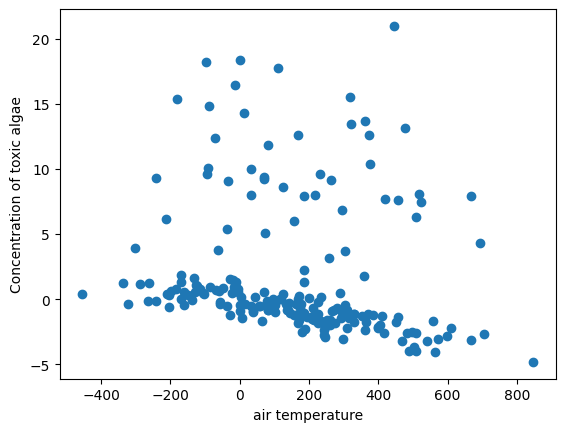

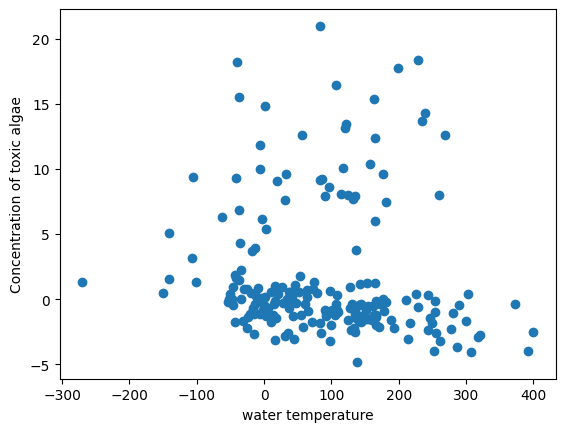

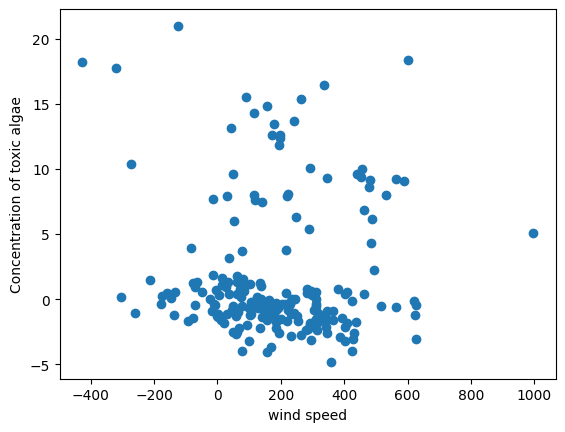

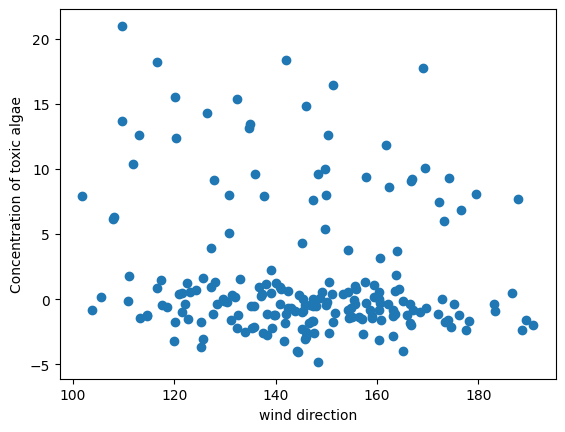

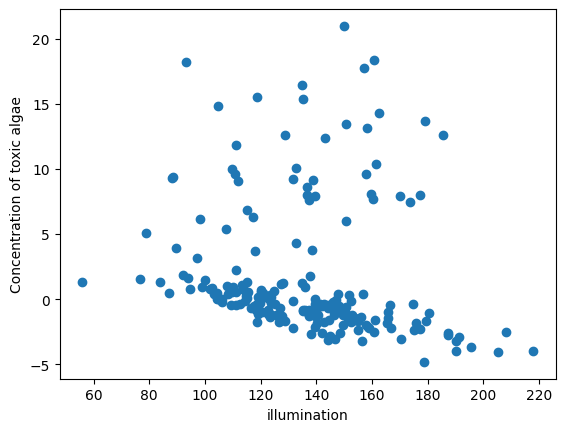

In [4]:
parameters = np.array(["air temperature", "water temperature", "wind speed", "wind direction", "illumination"])
for i in range(5):
    plot = plt.figure(i)
    plt.plot(dataX[:,i], dataY, 'o')
    plt.xlabel(parameters[i])
    plt.ylabel("Concentration of toxic algae")

Calculate SSE

In [5]:
def calculate_SSE(MSE, N):
  # Calculate the sum of squared errors
  SSE = MSE * N 
  return SSE

Create linear regression model

In [6]:
def create_model_LinearRegression(X, Y):
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(X, Y)
    return model

Predict the test data with the model

In [10]:
model_LinearRegression = create_model_LinearRegression(dataX, dataY)
# Predict the values for the test set
predY = model_LinearRegression.predict(testX)

# BEGIN: Calculate and print the coefficients and intercept
coefficients = model_LinearRegression.coef_
intercept = model_LinearRegression.intercept_

print("Coefficients: ", coefficients)
print("Intercept: ", intercept)
# END:

Coefficients:  [-0.02111726 -0.08905592 -0.00057093 -0.03550856  0.37739181]
Intercept:  -33.07041598772736


In [8]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(dataY, predY)
print("MSE: ", mse)

# Calculate R2
r2 = r2_score(dataY, predY)
print("R2: ", r2)

# Calculate the sum of squared errors
SSE = calculate_SSE(mse, len(dataY))
print("SSE: ", SSE)

MSE:  25.020208183362055
R2:  0.060559944384204645
SSE:  5004.041636672411


Visualize model prediction

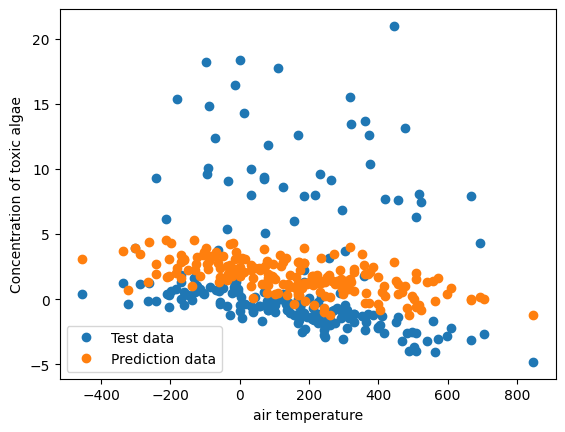

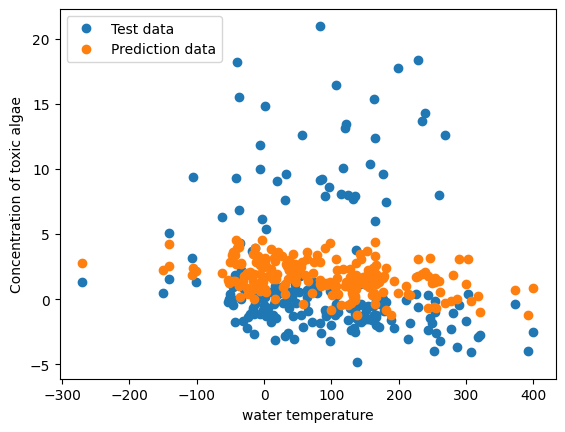

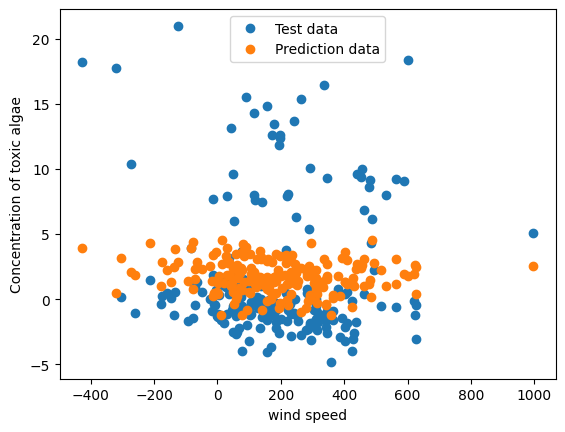

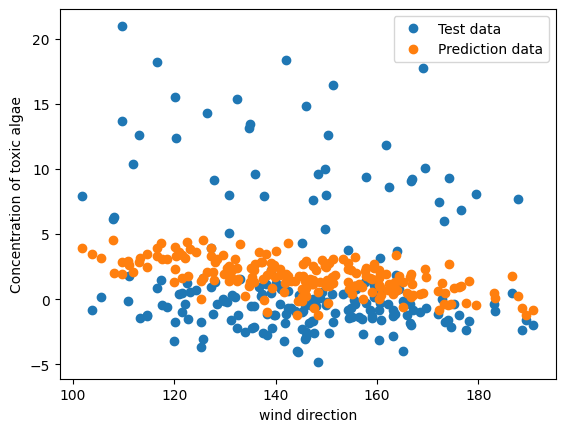

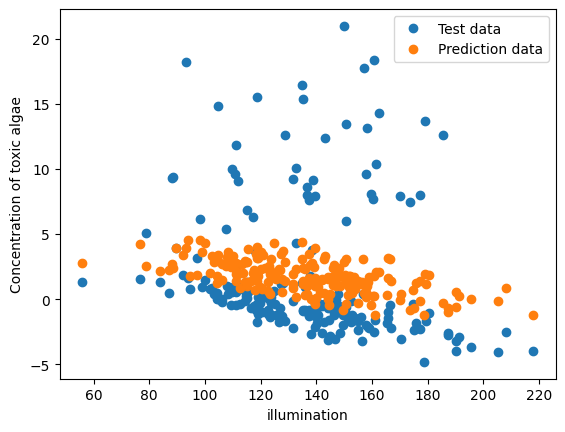

In [9]:
for i in range(5):
    plot = plt.figure(i)
    plt.plot(testX[:,i], dataY, 'o')
    plt.plot(testX[:,i], predY, 'o')
    plt.xlabel(parameters[i])
    plt.ylabel("Concentration of toxic algae")
    plt.legend(["Test data", "Prediction data"])